# Merge and read csv_files

In [1]:
import pandas as pd
import glob
import os

# Path to your folder
folder_path = "../../csv_files"

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and concatenate all CSVs into one DataFrame
df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Keep only rows where Experiment == "SR"
df = df[df["Experiment"] == "SR_ladida"]

# Show the combined DataFrame
print(df.head())

    Name Experiment  Trial                       Sequence     Recall
140  liv  SR_ladida      1  o g z v b c s h a p x l f q t    o g z v
141  liv  SR_ladida      2  l f u p b a t c o z k h n j s  l o f g p
142  liv  SR_ladida      3  p m j k u e y v r c q z n o x    p m j k
143  liv  SR_ladida      4  c e p d k i f v h y l t s j r  c e p d k
144  liv  SR_ladida      5  z l k e d r q f n i c h y m o  z l k e d


In [2]:
df["points"] = 0   # initialize column
df["fails"] = [[] for _ in range(len(df))]  # initialize fails as empty lists

for idx, row in df.iterrows():
    seq = row["Sequence"].split()
    rec = row["Recall"].split()
    
    points = 0
    fails = []
    mistake_found = False
    
    for s, r in zip(seq, rec):
        if not mistake_found and s == r:
            points += 1
        elif s != r:
            fails.append((s, r))
            mistake_found = True  # lock the points counter
    
    # save results back into df
    df.at[idx, "points"] = points
    df.at[idx, "fails"] = fails

df.head(10)

,Name,Experiment,Trial,Sequence,Recall,points,fails
140,liv,SR_ladida,1,o g z v b c s h a p x l f q t,o g z v,4,[]
141,liv,SR_ladida,2,l f u p b a t c o z k h n j s,l o f g p,1,"[(f, o), (u, f), (p, g), (b, p)]"
142,liv,SR_ladida,3,p m j k u e y v r c q z n o x,p m j k,4,[]
143,liv,SR_ladida,4,c e p d k i f v h y l t s j r,c e p d k,5,[]
144,liv,SR_ladida,5,z l k e d r q f n i c h y m o,z l k e d,5,[]
145,liv,SR_ladida,6,x g h v y c r s k o q f e i l,x g h v,4,[]
146,liv,SR_ladida,7,r j o z b a f y m u g n x c e,r j o,3,[]
147,liv,SR_ladida,8,z q u n k f j c b p t l i g m,z q u n k,5,[]
148,liv,SR_ladida,9,u j c t i z v h b l a n r p g,u j c t,4,[]
149,liv,SR_ladida,10,i o y e g l r f j t s n q u h,i u y e,1,"[(o, u)]"


# Confusion matrix

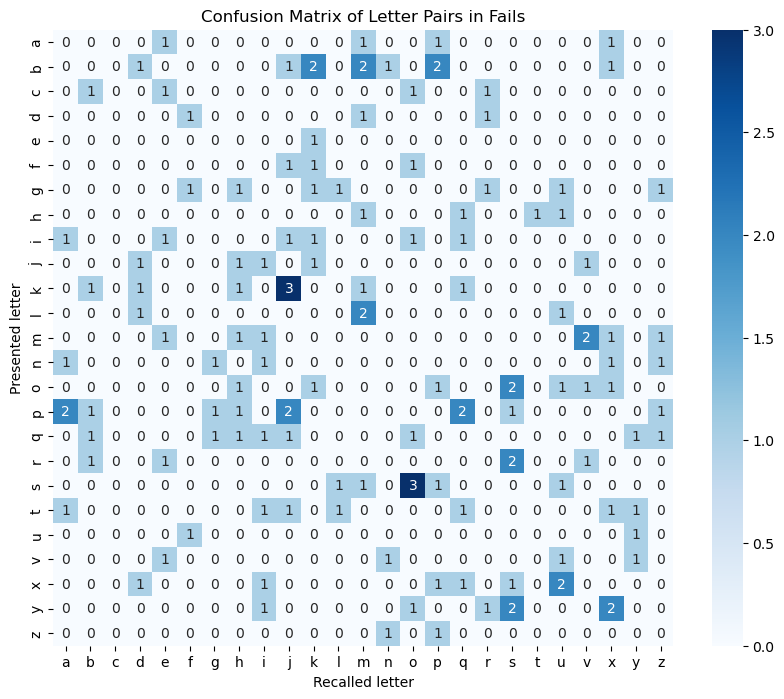

In [3]:
from collections import Counter
import seaborn as sns

import matplotlib.pyplot as plt

# Flatten all (s, r) pairs in fails column
all_fails = [pair for sublist in df["fails"] for pair in sublist]

# Count occurrences of each (s, r) pair
fail_counts = Counter(all_fails)

# Get sorted unique letters for axis labels
letters = sorted(set([s for s, _ in all_fails] + [r for _, r in all_fails]))

# Create confusion matrix DataFrame
conf_matrix = pd.DataFrame(0, index=letters, columns=letters)
for (s, r), count in fail_counts.items():
    conf_matrix.loc[s, r] = count

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Recalled letter")
plt.ylabel("Presented letter")
plt.title("Confusion Matrix of Letter Pairs in Fails")
plt.show()

In [5]:
import scipy.stats as stats
import numpy as np
points=df['points'].to_numpy()
print(np.mean(points))
stats.ttest_1samp(points,popmean= np.mean(points)).confidence_interval(confidence_level=0.95)

3.1875


ConfidenceInterval(low=2.666990236509144, high=3.708009763490856)